In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from datetime import datetime

In [36]:
df=pd.read_csv("covid_tracking.csv")
# df=pd.read_csv("daily_us.csv")

In [38]:
Data = pd.read_csv("mysub1.csv",encoding = "iso-8859-1",parse_dates=["date"])
Data.head(6)

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
0,2020-01-22,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,2020-01-27,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [25]:
df_copy=Data.copy()
df_copy.head()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
0,2020-01-22,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [59]:
df_copy.columns

Index(['date', 'state', 'positive', 'negative', 'hospitalized_currently',
       'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative',
       'on_ventilator_currently', 'on_ventilator_cumulative', 'recovered',
       'data_quality_grade', 'death', 'total_test_results'],
      dtype='object')

In [11]:
# sns.heatmap(df_copy.isnull(), cbar=False)
# df_copy.drop(["iso_country","pending","load_time",'pos_neg','positive_increase',"iso_subdivision","fips_code","fips",'last_update_et', 'hash',"total_test_results_increase","total","negative_increase","hospitalized_increase","hospitalized","death_increase","last_update_et","load_time","date_checked"],axis=1,inplace=True)

In [13]:
# Mysubmission = df_copy
# Mysubmission.to_csv('mysub1.csv', index=False)

In [14]:
df_copy.columns

Index(['date', 'state', 'positive', 'negative', 'hospitalized_currently',
       'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative',
       'on_ventilator_currently', 'on_ventilator_cumulative', 'recovered',
       'data_quality_grade', 'death', 'total_test_results'],
      dtype='object')

In [18]:
df_copy.describe()

,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,death,total_test_results
count,8468.000000,8.307000e+03,5669.000000,4436.000000,2925.000000,1251.000000,2594.000000,402.000000,5169.000000,7716.000000,8.483000e+03
mean,26926.346009,2.558598e+05,960.964368,4792.854148,376.957265,717.383693,199.772938,190.131841,12515.288063,1425.970451,2.774301e+05
std,55211.292464,5.325684e+05,1824.417554,13094.871950,637.023930,621.020971,297.867032,125.388275,21051.566100,3234.509562,5.764750e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,0.000000,0.000000e+00
25%,631.750000,1.258600e+04,103.000000,260.000000,68.000000,215.000000,30.000000,107.250000,658.000000,24.000000,1.146000e+04
50%,6254.500000,7.631900e+04,403.000000,1268.500000,152.000000,548.000000,94.000000,151.000000,3237.000000,262.000000,8.067900e+04
75%,29145.000000,2.762865e+05,931.000000,3917.000000,368.000000,1007.000000,213.000000,244.250000,14954.000000,1194.750000,2.990165e+05
max,435334.000000,6.480542e+06,18825.000000,89995.000000,5225.000000,3119.000000,2425.000000,565.000000,212216.000000,25090.000000,6.915876e+06


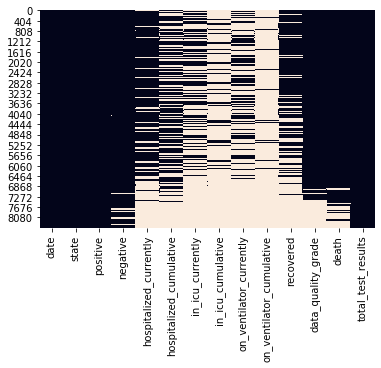

In [16]:
sns.heatmap(df_copy.isnull(), cbar=False)

In [4]:
Data.isnull().sum()

date                           0
state                          0
positive                      15
negative                     176
hospitalized_currently      2814
hospitalized_cumulative     4047
in_icu_currently            5558
in_icu_cumulative           7232
on_ventilator_currently     5889
on_ventilator_cumulative    8081
recovered                   3314
data_quality_grade          1175
death                        767
total_test_results             0
dtype: int64

In [60]:
df_copy.dtypes

date                        datetime64[ns]
state                               object
positive                           float64
negative                           float64
hospitalized_currently             float64
hospitalized_cumulative            float64
in_icu_currently                   float64
in_icu_cumulative                  float64
on_ventilator_currently            float64
on_ventilator_cumulative           float64
recovered                          float64
data_quality_grade                  object
death                              float64
total_test_results                   int64
dtype: object

In [5]:
columnData=Data.columns.drop(['date','state','data_quality_grade'])

In [6]:
for x in columnData:
    skewVal=Data[x].skew()
    print(x,":",skewVal)

positive : 4.210422278493607
negative : 5.314906748698258
hospitalized_currently : 4.794512666645252
hospitalized_cumulative : 5.506335555198955
in_icu_currently : 3.9755387013507213
in_icu_cumulative : 1.174719647709101
on_ventilator_currently : 2.9679504288621077
on_ventilator_cumulative : 1.1571157745778697
recovered : 2.8437334050632943
death : 4.604462945381705
total_test_results : 5.203081260928841


In [7]:
for x in columnData:
    sqskewVal=np.sqrt(Data[x]).skew()
    print(x,":",sqskewVal)

positive : 1.691186927122464
negative : 1.8351123651174064
hospitalized_currently : 1.9212440003453966
hospitalized_cumulative : 2.905822717333976
in_icu_currently : 1.7313191928060125
in_icu_cumulative : 0.3013498202898219
on_ventilator_currently : 1.3302490640510758
on_ventilator_cumulative : 0.3223806782982999
recovered : 1.3035703757109431
death : 1.9584412767412398
total_test_results : 1.7972090843481605


In [8]:
for x in columnData:
    Data[x]=np.sqrt(Data[x])
Data.head()    

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
0,2020-01-22,WA,1.414214,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
1,2020-01-23,WA,1.414214,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
2,2020-01-24,WA,1.414214,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
3,2020-01-25,WA,1.414214,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414214
4,2020-01-26,WA,1.414214,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414214


positive :


C:\Users\KARTHIK\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KARTHIK\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


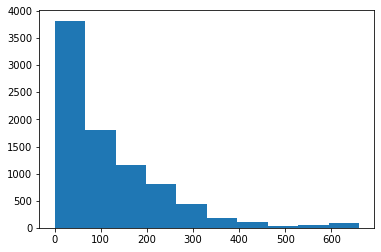

negative :


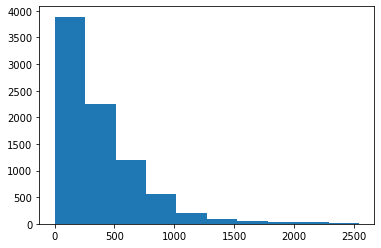

hospitalized_currently :


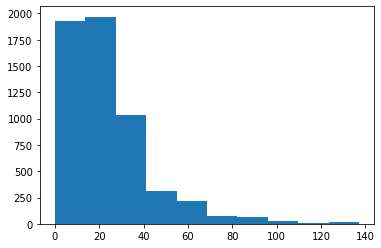

hospitalized_cumulative :


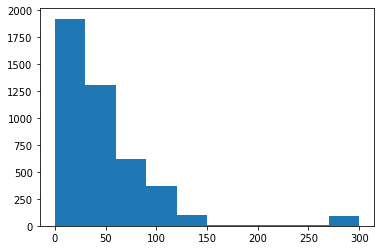

in_icu_currently :


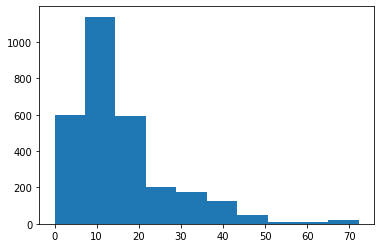

in_icu_cumulative :


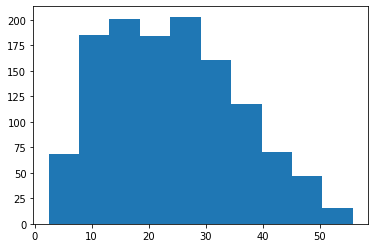

on_ventilator_currently :


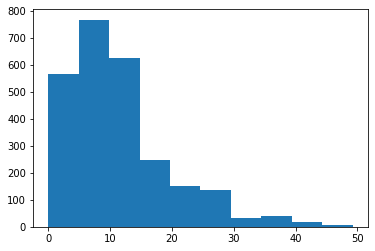

on_ventilator_cumulative :


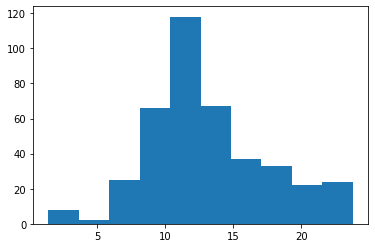

recovered :


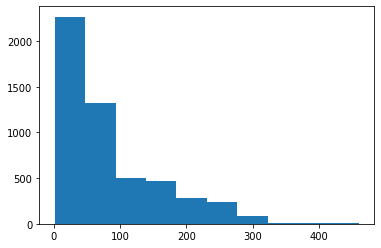

death :


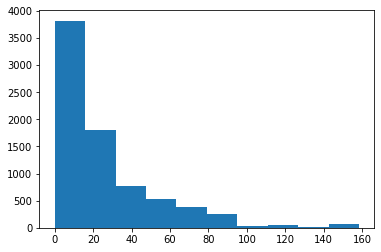

total_test_results :


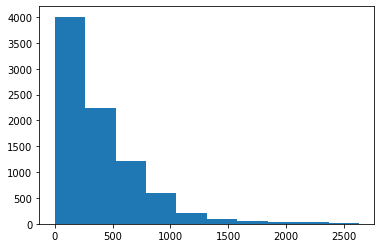

In [9]:
for x in columnData:
    print(x,":")
    plt.hist((Data[x]));
    plt.show()
    

In [10]:
# for x in columnData:
#     print(x,":")
#     plt.hist(np.sqrt(df_copy[x]));
#     plt.show()
    

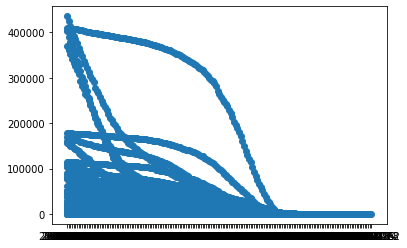

In [37]:
 plt.scatter(df["date"],df["positive"])

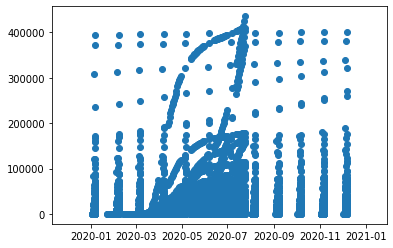

In [39]:
plt.scatter(Data["date"],Data["positive"])

In [43]:
Data[Data["Month"]>7]

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results,Month,Day
17,2020-08-02,WA,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,8,2
18,2020-09-02,WA,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,9,2
19,2020-10-02,WA,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,10,2
20,2020-11-02,WA,17.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,11,2
21,2020-12-02,WA,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,2020-12-07,WA,39218.0,629248.0,326.0,4662.0,NaN,NaN,57.0,NaN,NaN,B,1424.0,668466,12,7
7759,2020-12-07,WI,39877.0,653352.0,264.0,3824.0,74.0,800.0,NaN,NaN,28318.0,A+,827.0,693229,12,7
7760,2020-12-07,WI,39877.0,653352.0,264.0,3824.0,74.0,800.0,NaN,NaN,28318.0,A+,827.0,693229,12,7
7761,2020-12-07,WV,4207.0,202829.0,56.0,NaN,14.0,NaN,7.0,NaN,2806.0,B,96.0,207036,12,7


In [11]:
x=Data.groupby("date").count()

In [12]:
Data.groupby("state").count()

,date,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,recovered,data_quality_grade,death,total_test_results
state,,,,,,,,,,,,,
AK,141,141,141,98,34,0,0,57,0,109,124,141,141
AL,140,140,137,123,112,0,105,0,105,64,124,132,140
AR,141,141,141,125,111,0,8,122,111,122,124,125,141
AS,131,116,116,0,0,0,0,0,0,0,91,115,131
AZ,143,143,143,103,143,103,0,103,0,102,124,134,143
CA,143,143,143,120,0,120,0,0,0,0,124,135,143
CO,142,142,142,125,126,0,0,0,0,91,124,133,142
CT,140,140,139,125,85,0,0,0,0,85,124,128,140
DC,142,142,142,97,0,85,0,96,0,121,124,128,142


In [40]:
import calendar
month=[]
Day=[]
mon=[]
for x in Data["date"]:
    month.append(x.month)
    Day.append(x.day)

In [41]:
Data["Month"]=month
Data["Day"]=Day

In [45]:
df.date.unique()

array(['2020-07-24', '2020-07-23', '2020-07-22', '2020-07-21',
       '2020-07-20', '2020-07-19', '2020-07-18', '2020-07-17',
       '2020-07-16', '2020-07-15', '2020-07-14', '2020-07-13',
       '2020-07-12', '2020-07-11', '2020-07-10', '2020-07-09',
       '2020-07-08', '2020-07-07', '2020-07-06', '2020-07-05',
       '2020-07-04', '2020-07-03', '2020-07-02', '2020-07-01',
       '2020-06-30', '2020-06-29', '2020-06-28', '2020-06-27',
       '2020-06-26', '2020-06-25', '2020-06-24', '2020-06-23',
       '2020-06-22', '2020-06-21', '2020-06-20', '2020-06-19',
       '2020-06-18', '2020-06-17', '2020-06-16', '2020-06-15',
       '2020-06-14', '2020-06-13', '2020-06-12', '2020-06-11',
       '2020-06-10', '2020-06-09', '2020-06-08', '2020-06-07',
       '2020-06-06', '2020-06-05', '2020-06-04', '2020-06-03',
       '2020-06-02', '2020-06-01', '2020-05-31', '2020-05-30',
       '2020-05-29', '2020-05-28', '2020-05-27', '2020-05-26',
       '2020-05-25', '2020-05-24', '2020-05-23', '2020-

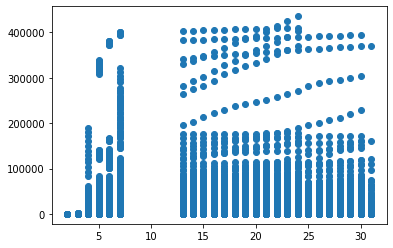

In [29]:
plt.scatter(Data["Day"],Data["positive"])